<a href="https://colab.research.google.com/github/RF-Lab/lab_sources/blob/master/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D0%B8_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D1%8B_%D1%86%D0%B8%D1%84%D1%80%D0%BE%D0%B2%D0%BE%D0%B9_%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B8_%D1%81%D0%B8%D0%B3%D0%BD%D0%B0%D0%BB%D0%BE%D0%B2_%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_06_21_03_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 13:10-14:40 	БИСО-1,2-16 Методы и алгоритмы цифровой обработки сигналов
### Практическое занятие в рамках раздела "Методы цифровой обработки случайных последовательностей".

**Дата проведения занятия:** 21.03.2020. 

**Место/Форма проведения занятия:** Дистанционное обучение/Конференция Skype. Ссылка на видео-конференцию будет предоставлена непосредственно перед занятием по почте.

**Цель:** Закрепление основных терминов и определений из теории СП.

**Задание 1**. Сформировать последовательность в виде $x_n=\left[\sum_{m=1}^{12}\psi_m\right]-6$. Где $\psi_m$-случайная равномерно распределенная переменная. 
Построить гистограмму. Сделать предположения о законе распределения. Пояснить характер распределения.

(10000, 12)
(10000,)


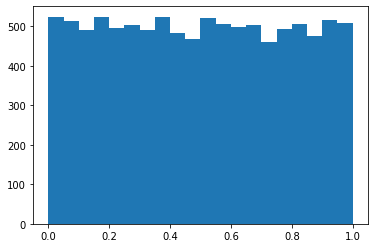

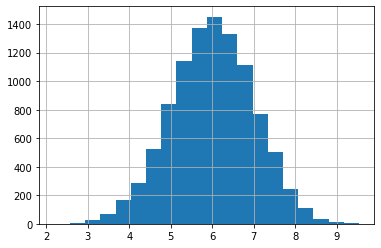

In [0]:
import numpy as np
import matplotlib.pyplot as plt

N     = 10000 

psi   = np.random.rand(N,12)
print(psi.shape)
_ =plt.hist( psi[:,0],20 )


x     = np.sum(psi,axis=1)
print(x.shape)




fig = plt.figure()
_ =plt.hist( x,20 )
plt.grid('true')
#plt.plot(bin_edges,hist)
#plt.grid('true')



Задание 2. Оценка взаимной корреляции и коэффициента корреляции

*Корреляция*

$r=\frac{1}{N}\sum_{n=1}^{N}x_n y_{n}$

*Коэфициент корреляции*

Если массивы $x$ и $y$ линейно связаны, то можно утверждать, что
$y_n=c*x_n$
Тогда, пользуясь методом наименьших квадратов

$\left[\sum_{n=1}^{N} (y_n-cx_n)^2\right] \rightarrow min$

$c = (x^Tx)^{-1}x^Ty=\frac{\sum_{n=1}^{N}x_n y_{n}}{\sum_{n=1}^{N}x_n^2}$,-коэффициент корреляции $\in -1\cdots 1$

Задание: сформировать две выборки для двух случайных гауссовых процессов так, чтобы коэффициент корреляции между ними составлял величину $0.1$



In [0]:
import numpy as np
N = 100000
x = np.random.randn(N,1)
y = np.random.randn(N,1) + x*0.1

r = (x.transpose() @ y) / (x.transpose() @ x)
r1 = (x.transpose() @ y) / x.size

print(r1)

from scipy import signal
h = signal.firwin(15, 0.1)

print(h)

[[0.10068409]]
[0.00439411 0.00945819 0.02406611 0.04945214 0.0823258  0.11548173
 0.14016995 0.14930392 0.14016995 0.11548173 0.0823258  0.04945214
 0.02406611 0.00945819 0.00439411]


Задание 3. Сформировать два случайных гауссовых процесса с дисперсиями $9$ и $36$. Сформировать два детерминированных процесса с амплитудами $3$ и $6$.
Оценить дисперсию суммы случайных последовательностей. Расчитать дисперсию суммы детерминированных последовательностей. Сформулировать принцип расчета дисперсии суммы случайных процессов. 

In [0]:
x = np.random.randn(N,1)*3
y = np.random.randn(N,1)*6

a = np.ones((N,1))*3 
b = np.ones((N,1))*6 


print( x.transpose() @ x / N )
print( y.transpose() @ y / N )

print( a.transpose() @ a / N )
print( b.transpose() @ b / N )

print( (a+b).transpose() @ (a+b) / N )
print( (3+6)*(3+6) )

print( (x+y).transpose() @ (x+y) / N )

[[9.05435235]]
[[35.92483021]]
[[9.]]
[[36.]]
[[81.]]
81
[[44.92895301]]


**Задание 4**. Сформировать выборку случайного процесса в виде суммы постоянной детерминированной величины и случайного гауссового процесса. Получить оценку постоянной величины по выборке в виде среднего. Расчитать дисперсию ошибки оценки. 

Задание 5. Сформировать выборку для векторного случайного процесса с заданной корреляционной матрицей $\Sigma=\begin{pmatrix}
1 & 0.1 \\
0.1 & 1 \\
\end{pmatrix}$.